<a href="https://colab.research.google.com/github/heyiamaditya/Image_Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : This program classifies images

In [ ]:
!pip install keras

In [ ]:
!pip install keras.models

In [ ]:

#Import the liabries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
#plt.style.available
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data() 

In [ ]:
#Look at the datatypes of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Get the shape of Arrays
print('x_train_shape',x_train.shape)
print('y_train_shape',y_train.shape)
print('x_test_shape',x_test.shape)
print('y_test_shape',y_test.shape)


x_train_shape (50000, 32, 32, 3)
y_train_shape (50000, 1)
x_test_shape (10000, 32, 32, 3)
y_test_shape (10000, 1)


In [69]:
#Take a look at he first image as an array
index=50
x_train[index]

array([[[0.0627451 , 0.29803922, 0.29019608],
        [0.06666667, 0.30196078, 0.29411765],
        [0.06666667, 0.30196078, 0.29411765],
        ...,
        [0.24313725, 0.41568627, 0.34117647],
        [0.21568627, 0.38823529, 0.31372549],
        [0.2       , 0.36862745, 0.29411765]],

       [[0.0627451 , 0.29803922, 0.29019608],
        [0.0627451 , 0.29803922, 0.29019608],
        [0.05882353, 0.29411765, 0.29019608],
        ...,
        [0.24313725, 0.42745098, 0.32941176],
        [0.22745098, 0.41176471, 0.31372549],
        [0.20392157, 0.39215686, 0.29411765]],

       [[0.0627451 , 0.29803922, 0.29019608],
        [0.05882353, 0.29411765, 0.28627451],
        [0.05882353, 0.29411765, 0.28627451],
        ...,
        [0.22352941, 0.43137255, 0.30980392],
        [0.23137255, 0.43529412, 0.31372549],
        [0.21960784, 0.42745098, 0.30588235]],

       ...,

       [[0.37647059, 0.43137255, 0.54117647],
        [0.44705882, 0.49803922, 0.62352941],
        [0.46666667, 0

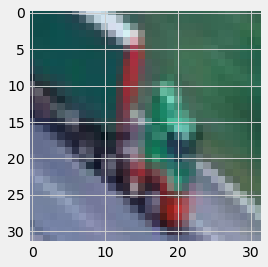

In [70]:
#show the image as a picture
img= plt.imshow(x_train[index])

In [71]:
#Get the image Label
print('The image label is:', y_train[index] )

The image label is: [9]


In [72]:
#Get the image classification
classification= ['airplane', 'automobile', 'bird', 'cat', ' deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#print the image class
print('The image classification is:',classification[y_train[index][0]] )

The image classification is: truck


In [ ]:
#convert the labels into a set of 10 numbera to input the neural network
y_train_one_hot= to_categorical(y_train)
y_test_one_hot= to_categorical(y_train)

In [ ]:
#print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#print the new labels of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#Normalize the pixels to be the values b/w   0 and 1
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [ ]:
# Crete the model architecture
model = Sequential()

#Add the first layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

#Add a polling alyer
model.add(MaxPooling2D(pool_size=(2,2)) )

#Add another conolution layer
model.add(Conv2D(32, (5,5), activation='relu') )

#Add another polling alyer
model.add(MaxPooling2D(pool_size=(2,2)) )

#Add a flattering layer
model.add(Flatten())

#Add a layer with 1000 neuron
model.add(Dense(1000, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5) )

#Add a layer with 500 neuron
model.add(Dense(500, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5) )

#Add a layer with 250 neuron
model.add(Dense(250, activation='relu'))

#Add a layer with 10 neuron
model.add(Dense(10, activation='softmax'))


In [ ]:
#Compile the model
model.compile(loss= 'categorical_crossentrophy',
              optimizer='adam',
              metrics = ['accuracy'])
